In [50]:
import pandas as pd

In [51]:
url = 'pilrek-anon.csv'
df  = pd.read_csv(url)

In [52]:
df.tail()

,Timestamp,Kategori Anda,Kategori Umur Anda,CaRek Pilihan,Alasan Memilih CaRek,Harapan Anda
2024,9/25/2019 8:54:33,Umum,25 - 40 th,Dicky Rezady Munaf (FSRD),Keberhasilan dan prestasi,Yang bersangkutan telah berhasil dalam mengemb...
2025,9/26/2019 13:30:25,Pegawai / Tendik,25 - 40 th,Kadarsah Suryadi (FTI-TI),Kecerdasan dan keberanian utk kemajuan ITB,NaN
2026,10/8/2019 14:28:00,Alumni,25 - 40 th,Dewi Larasati (SAPPK),"Emansipasi, kesetaraan dan kebhinekaan",NaN
2027,10/8/2019 14:59:53,Alumni,> 40 th,Dewi Larasati (SAPPK),Akhlak dan budi pekerti,ITB jadi universitas yang melahirkan tokoh2 du...
2028,10/8/2019 15:10:17,Alumni,> 40 th,Dewi Larasati (SAPPK),Sesuai dengan kriteria kekinian (Rektor 4.0),Semoga terpilih dan sukses


In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
df.shape
df.dtypes

Timestamp               object
Kategori Anda           object
Kategori Umur Anda      object
CaRek Pilihan           object
Alasan Memilih CaRek    object
Harapan Anda            object
dtype: object

In [55]:
df.isna().sum()

Timestamp                  0
Kategori Anda              0
Kategori Umur Anda         0
CaRek Pilihan              0
Alasan Memilih CaRek       0
Harapan Anda            1123
dtype: int64

In [56]:
#Menghitung nilai modus dari nama calon rektor
CaRekPilihan_mode = df['CaRek Pilihan'].mode()
print(CaRekPilihan_mode)

0    Kadarsah Suryadi (FTI-TI)
dtype: object


In [57]:
#Membuat dataframe baru yang berisi khusus ca-rektor favorite tersebut
temp = df.groupby('CaRek Pilihan')
fav = temp.get_group('Kadarsah Suryadi (FTI-TI)') #Parameter nama CaRek harus diganti apabila modus berubah
fav.tail()

,Timestamp,Kategori Anda,Kategori Umur Anda,CaRek Pilihan,Alasan Memilih CaRek,Harapan Anda
1760,9/6/2019 9:23:04,Pegawai / Tendik,25 - 40 th,Kadarsah Suryadi (FTI-TI),Program ybs utk peningkatan income dan kesejah...,peningkatan income dan kesejahteraan dosen / p...
1822,9/8/2019 17:25:50,Umum,> 40 th,Kadarsah Suryadi (FTI-TI),Keberhasilan dan prestasi,NaN
1852,9/11/2019 8:51:05,Dosen,> 40 th,Kadarsah Suryadi (FTI-TI),Program ybs utk peningkatan income dan kesejah...,Rektor ITB ke depan fapat menjadi good father ...
2015,9/17/2019 22:27:18,Mahasiswa,< 25 th,Kadarsah Suryadi (FTI-TI),Sesuai dengan kriteria kekinian (Rektor 4.0),NaN
2025,9/26/2019 13:30:25,Pegawai / Tendik,25 - 40 th,Kadarsah Suryadi (FTI-TI),Kecerdasan dan keberanian utk kemajuan ITB,NaN


In [58]:
#Membuat nilai per kategori untuk 
fav['Kategori Anda'].value_counts()

Alumni              83
Pegawai / Tendik    82
Umum                67
Mahasiswa           57
Dosen               35
Name: Kategori Anda, dtype: int64

In [59]:
#PLOT RADAR CHART untuk power seorang CaRek
#Terinspirasi dari Winning Eleven
import matplotlib.pyplot as plt

CaRek_voters = fav['Kategori Anda'].value_counts()
power = pd.DataFrame([CaRek_voters])


In [69]:
from math import pi
import matplotlib.pyplot as plt
%matplotlib inline

#Create a data frame from "fav"
CaRekFav = fav['Kategori Anda'].value_counts()

data = pd.DataFrame([CaRekFav], index = [CaRekPilihan_mode])
data


,Alumni,Pegawai / Tendik,Umum,Mahasiswa,Dosen
Kadarsah Suryadi (FTI-TI),83,82,67,57,35


In [70]:
Attributes =list(data)
AttNo = len(Attributes)

ValueError: x and y must have same first dimension, but have shapes (7,) and (1, 5)

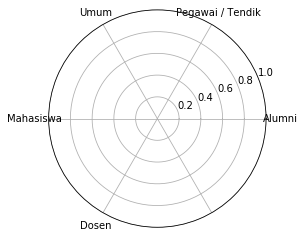